In [42]:
import math
import scipy
from integrate import Trapezoidal
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
def test_integral_solver(integrand, analytical, x, step=0.0001):
    integrator = Trapezoidal(step)
    integrand = lambda t : math.sin(t**2)

    f = lambda x : integrator(integrand, 0, x)

    print(f"x = {x}")
    print(f"Our numerical solution: {f(x)}")
    print(f"Scipy's numerical solution: {scipy.integrate.quad(integrand, 0, x)[0]}")

    def analytical_solution(x):
        return analytical(x) - analytical(step)

    print(f"Our analytical solution: {analytical_solution(x)}")


    x_axis = np.linspace(0, x, num=15)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(x_axis, [f(x) for x in x_axis], label = "Our numerical solution")
    ax1.set_title("Our numerical solution")
    ax2.plot(x_axis, [analytical_solution(x) for x in x_axis], label = "Our analytical solution")
    ax2.set_title("Our analytical solution")

    plt.show()

x = 2
Our numerical solution: 0.804775732631279
Scipy's numerical solution: 0.8047764893437559
Our analytical solution: 0.8047764893437559


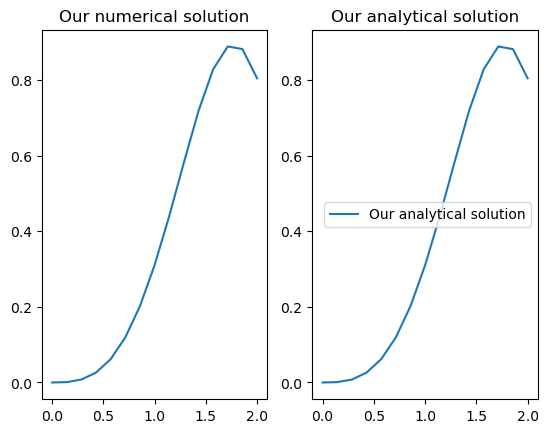

In [73]:
integrand = lambda t : math.sin(t**2)
x = 2
analytical = lambda x : math.sqrt(np.pi/2) * scipy.special.fresnel(math.sqrt(2/math.pi) * x)[0]

test_integral_solver(integrand, analytical, x, step=0.000001)

In [31]:
integrator = Trapezoidal(0.0001)
integrand = lambda t : 1 / math.sqrt(t)

f = lambda x : integrator(integrand, 0, x)
x = 10
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : 2 * math.sqrt(x)
print(analytical(x) - analytical(0))

6.314983398012097
(6.324555320336752, 3.375077994860476e-14)
6.324555320336759


In [40]:
integrator = Trapezoidal(0.0001)
integrand = lambda t : -math.log(t)

f = lambda x : integrator(integrand, 0, x)
x = 0.5
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : x - x * math.log(x)
print(analytical(x))

0.846551009478061
(0.8465735902799725, 9.992007221626409e-16)
0.8465735902799727


In [41]:
integrator = Trapezoidal(0.000001)
integrand = lambda t : math.exp(t) * math.cos(t)

f = lambda x : integrator(integrand, 0, x)
x = 5
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : math.exp(x) * (math.cos(x) + math.sin(x)) / 2 - 0.5
print(analytical(x))

-50.608889918406774
(-50.608889940182415, 7.288959426851113e-13)
-50.608889940182415


In [42]:
integrator = Trapezoidal(0.000001)
integrand = lambda t : t**2 * math.cosh(t**2)

f = lambda x : integrator(integrand, 0, x)
x = 1
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : (2 * (x * math.exp(x**2) - x * math.exp(-x**2)) - math.sqrt(math.pi) * (scipy.special.erfi(x) - math.erf(x)) ) / 8
print(analytical(x))

0.40864369355133734
(0.4086436935482122, 4.5368563744509165e-15)
0.40864369354821206


In [25]:
integrator = Trapezoidal(0.00001)
integrand = lambda t : math.sin(1/t) * math.sqrt(t) + math.cos(t)

f = lambda x : integrator(integrand, 0, x)
x = 2
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : math.sin(x) + (2 * math.sqrt(x) * (math.sin(1/x)*x + 2*math.cos(1/x)) + 2**(5/2) * math.sqrt(math.pi) * scipy.special.fresnel(math.sqrt(2 / (math.pi * x)))[0]) / 3
print(analytical(x)-analytical(0.0000001))

2.105714500452286
(2.1057142579335517, 4.039141261058767e-05)
1.671085526418816
2.105712991897069


/tmp/ipykernel_6373/1552586722.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(scipy.integrate.quad(integrand, 0, x))


In [30]:
integrator = Trapezoidal(0.000001)
integrand = lambda t : math.sin(t) * math.sqrt(1/t) + math.cos(t)

f = lambda x : integrator(integrand, 0, x)
x = 2
print(f(x))
print(scipy.integrate.quad(integrand, 0, x))

analytical = lambda x : math.sin(x) + (2 * math.sqrt(x) * (math.sin(1/x)*x + 2*math.cos(1/x)) + 2**(5/2) * math.sqrt(math.pi) * scipy.special.fresnel(math.sqrt(2 / (math.pi * x)))[0]) / 3
print(analytical(x) - analytical(0.0000001))

2.320150636684737
(2.320150409527074, 3.945288540307956e-12)
2.105712991897069
